## Preparing our data

### Step 1.1: Read in our data

Is it a CSV?

In [80]:
import pandas as pd

In [81]:
df = pd.read_csv("wine-reviews.csv")
df = df[pd.notnull(df.category)]
df.head()

,alcohol,appellation,bottle size,category,date published,designation,importer,price,taster,url,user avg rating,variety,wine_desc,wine_name,wine_points,winery
0,14%,"Barolo, Piedmont, Italy",750 ml,Red,9/1/2017,Cannubi,Oliver McCrum Wines,"$60, Buy Now",Kerin O’Keefe,http://www.winemag.com/buying-guide/brezza-201...,Not rated yet [Add Your Review],Nebbiolo,One of the best expressions from the classic C...,Brezza 2013 Cannubi (Barolo),98.0,Brezza
1,14%,"Barolo, Piedmont, Italy",750 ml,Red,9/1/2017,Brunate,Vinifera Imports,"N/A, Buy Now",Kerin O’Keefe,http://www.winemag.com/buying-guide/giuseppe-r...,Not rated yet [Add Your Review],Nebbiolo,"Classic Nebbiolo aromas of new leather, mentho...",Giuseppe Rinaldi 2013 Brunate (Barolo),98.0,Giuseppe Rinaldi
2,14.5%,"Barolo, Piedmont, Italy",750 ml,Red,9/1/2017,Vigna Rionda Riserva,Vineyard Brands,"$151, Buy Now",Kerin O’Keefe,http://www.winemag.com/buying-guide/massolino-...,Not rated yet [Add Your Review],Nebbiolo,From one of the most celebrated vineyards in t...,Massolino 2011 Vigna Rionda Riserva (Barolo),98.0,Massolino
3,14%,"Barolo, Piedmont, Italy",750 ml,Red,9/1/2017,Monvigliero,Bacchanal Wine Imports,"$70, Buy Now",Kerin O’Keefe,http://www.winemag.com/buying-guide/comm-g-b-b...,Not rated yet [Add Your Review],Nebbiolo,Always the firm's showstopper and one of the b...,Comm. G. B. Burlotto 2013 Monvigliero (Barolo),98.0,Comm. G. B. Burlotto
4,14.5%,"Barolo, Piedmont, Italy",750 ml,Red,9/1/2017,Badarina,Massanois Imports,"$75, Buy Now",Kerin O’Keefe,http://www.winemag.com/buying-guide/grimaldi-b...,Not rated yet [Add Your Review],Nebbiolo,"A balsamic note of menthol, dark culinary spic...",Grimaldi Bruna 2013 Badarina (Barolo),97.0,Grimaldi Bruna


### Step 1.2: Creating a label column

It needs to be a number, right? Before we just did "does it contain Italian" and make `True` be `1` and `False` be `0`, but most of the time we have **more than that.**

Let's talk about `LabelEncoder`. It can `fit`, it can `transform`, and it can `fit_transform`.

In [82]:
from sklearn.preprocessing import LabelEncoder

In [123]:
incomplete_df = pd.read_csv("wine-reviews.csv")
incomplete_df = incomplete_df[pd.isnull(incomplete_df.category)]
incomplete_df.head()

,alcohol,appellation,bottle size,category,date published,designation,importer,price,taster,url,user avg rating,variety,wine_desc,wine_name,wine_points,winery
2656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.winemag.com/buying-guide/kendall-ja...,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
df.category.value_counts()

Red            2115
White          1393
Rose            401
Sparkling        62
Dessert          38
Port/Sherry      10
Name: category, dtype: int64

In [84]:
# Add the labels to the df
le = LabelEncoder()
df['label'] = le.fit_transform(df['category'])
df.head()

,alcohol,appellation,bottle size,category,date published,designation,importer,price,taster,url,user avg rating,variety,wine_desc,wine_name,wine_points,winery,label
0,14%,"Barolo, Piedmont, Italy",750 ml,Red,9/1/2017,Cannubi,Oliver McCrum Wines,"$60, Buy Now",Kerin O’Keefe,http://www.winemag.com/buying-guide/brezza-201...,Not rated yet [Add Your Review],Nebbiolo,One of the best expressions from the classic C...,Brezza 2013 Cannubi (Barolo),98.0,Brezza,2
1,14%,"Barolo, Piedmont, Italy",750 ml,Red,9/1/2017,Brunate,Vinifera Imports,"N/A, Buy Now",Kerin O’Keefe,http://www.winemag.com/buying-guide/giuseppe-r...,Not rated yet [Add Your Review],Nebbiolo,"Classic Nebbiolo aromas of new leather, mentho...",Giuseppe Rinaldi 2013 Brunate (Barolo),98.0,Giuseppe Rinaldi,2
2,14.5%,"Barolo, Piedmont, Italy",750 ml,Red,9/1/2017,Vigna Rionda Riserva,Vineyard Brands,"$151, Buy Now",Kerin O’Keefe,http://www.winemag.com/buying-guide/massolino-...,Not rated yet [Add Your Review],Nebbiolo,From one of the most celebrated vineyards in t...,Massolino 2011 Vigna Rionda Riserva (Barolo),98.0,Massolino,2
3,14%,"Barolo, Piedmont, Italy",750 ml,Red,9/1/2017,Monvigliero,Bacchanal Wine Imports,"$70, Buy Now",Kerin O’Keefe,http://www.winemag.com/buying-guide/comm-g-b-b...,Not rated yet [Add Your Review],Nebbiolo,Always the firm's showstopper and one of the b...,Comm. G. B. Burlotto 2013 Monvigliero (Barolo),98.0,Comm. G. B. Burlotto,2
4,14.5%,"Barolo, Piedmont, Italy",750 ml,Red,9/1/2017,Badarina,Massanois Imports,"$75, Buy Now",Kerin O’Keefe,http://www.winemag.com/buying-guide/grimaldi-b...,Not rated yet [Add Your Review],Nebbiolo,"A balsamic note of menthol, dark culinary spic...",Grimaldi Bruna 2013 Badarina (Barolo),97.0,Grimaldi Bruna,2


## Creating features

These need to be numbers, too, right?

### Step 2.0: If you aren't analyzing text, you'll just move some columns into `features_df` like

```
features_df = df[['age','weight']]
```

### Step 2.1: If analyzing text, create your vectorizer

Which kind of vectorizer are you using? A **CountVectorizer** to only count values, or a **TfIdfVectorizer** to count percentages? Once you've figured it out, answer the following questions.

1. **vocabulary**: are you looking for a specific set of words? It's just a normal list.
1. **ngram_range**: are you only vectorizing single words, or are you also looking at multi-word phrases? By default it only looks for one word `(1,1)`, but you can look for 1-2 word phrases `(1,2)`, only 4-word phrases `(4,4)`, etc.
1. **binary**: Do you want to just test to see if a word is included or not, and don't care about counting? `True` or `False`.
1. **tokenizer**: are you going to do any stemming or lemmatization, or are you okay with the existing words?
1. **stop_words**: do you use stopwords? Stopwords are useless for judging content, but good for judging style. `english` will give default words, or use a list to use multiple.
1. **max_df**: do you want to not include words that show up in a lot of documents? `0.0`-`1.0` to have a percentage as a ceiling, or an integer to have a maximum number of documents. For example, "5" means "Ignore anything that shows up in more than 5 documents" 
1. **min_df**: do you want to not include words that show up in a only a few documents? `0.0`-`1.0` to have a percentage as a floor, or an integer to have a maximum number of documents. For example, "0.05" means "Ignore anything that shows up in fewer than 5% of documents" 
1. **use_idf**: do you want to use inverse document frequency, which makes less frequent words more important? (`TfidfVectorizer` only)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

When you build your vectorizer, this is where all of the options above go, like **stop_words** and **ngram_range**.

In [96]:
vec = CountVectorizer(stop_words='english', binary=True)
#vec = TfIdfVectorizer()
matrix = vec.fit_transform(df.wine_desc.str.replace('\d', ''))
features_df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
features_df.head()

,aaron,abandon,abbot,abetina,ability,able,abound,abounds,abrasive,abrupt,...,zingy,zip,zippy,zips,zone,zweigelt,émilion,über,überaromatic,žilavka
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Classifying

### Step 3.1: Selecting and creating a classifier

You have a few options! Generally you can try them all and pick the one that ends up working best.

* **Multinominal Naive Bayes - (multiple numbers)**: You count the words. You care about whether a word appears once or twice or three times or ten times. *This is better for long passages*
* **Bernoulli Naive Bayes - True/False Bayes:** You only care if the word shows up (`1`) or it doesn't show up (`0`) - *this is better for short passages*
* **Decision Trees** are another kind of classifier. They can make fun charts. They don't care about whether things are correlated, which can be a problem for Naive Bayes.

In [105]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

# What kind of classifier?
# clf = BernoulliNB()
# clf = MultinomialNB()
clf = DecisionTreeClassifier()

### Step 3.2: Train/test split

Some data you'll train your classifier with, some you'll use for testing. That's how you know how good your model is!

**You can only train and test on rows you know the answer to already.** Do you have 100,000 emails but only know what 2,000 of them are about? You'll need to **filter that first**.

In [106]:
# SANITY CHECK: What are your features?
# They are probably in a separte df just for features, and they should be numbers.
features_df.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [107]:
# SANITY CHECK: What are your labels?
# They're probably in your original dataframe, and they should be numbers.
df.label.head()

0    2
1    2
2    2
3    2
4    2
Name: label, dtype: int64

Okay, now you're allowed to do your split. Once you know how this works you can delete all of the comments.

In [108]:
# train_test_split will split our data into two parts
from sklearn.model_selection import train_test_split

# Splitting into...
# X = are all our features
# y = are all our labels
# X_train are our features to train on (80%)
# y_train are our labels to train on (80%)
# X_test are our features to test on (20%)
# y_train are our labels to test on (20%)

X_train, X_test, y_train, y_test = train_test_split(
    features_df.values,  # Is this what your features are?
    df.label, # Is this what your labels are?
    test_size=0.2) 

# the first parameter is our FEATURES. It usually needs .values if it's a big dataframe
# the second parameter is the LABEL as a number
# 80% training, 20% testing

### Step 3.3: Fit and score your model

Teach it what you know, and see how well did you did!

First we'll **teach it with training data.**

In [109]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Then we'll **score with testing data**.

In [110]:
clf.score(X_test, y_test)

0.87437810945273631

You can also check to see how well it does against data it's already seen, if you want!

In [111]:
clf.score(X_train, y_train)

0.99968895800933122

## Understanding your classifier

### Method 1: Top words for each category

This only works for Naive Bayes classifiers.

In [104]:
# From http://scikit-learn.org/stable/auto_examples/text/document_classification_20newsgroups.html
import numpy as np

le.classes_

class_labels = le.classes_
feature_names = vec.get_feature_names()
for i, class_label in enumerate(class_labels):
    try:
        top10 = np.argsort(clf.coef_[i])[-10:]
        features_names = vec.get_feature_names()
        print("%s: %s" % (class_label, " ".join(features_names[j] for j in top10)))
    except:
        pass

Dessert: finish honey acidity wine rich flavors nose sweet sweetness palate
Port/Sherry: fig vintage rich dried drink caramel nose aromas finish flavors
Red: drink finish black cherry palate tannins fruit aromas flavors wine
Rose: light finish rosé cherry aromas red palate flavors acidity wine
Sparkling: finish pinot citrus bright apple flavors sparkler aromas palate acidity
White: acidity apple lemon aromas nose fruit finish wine flavors palate


### With DecisionTreeClassifier (lower score)

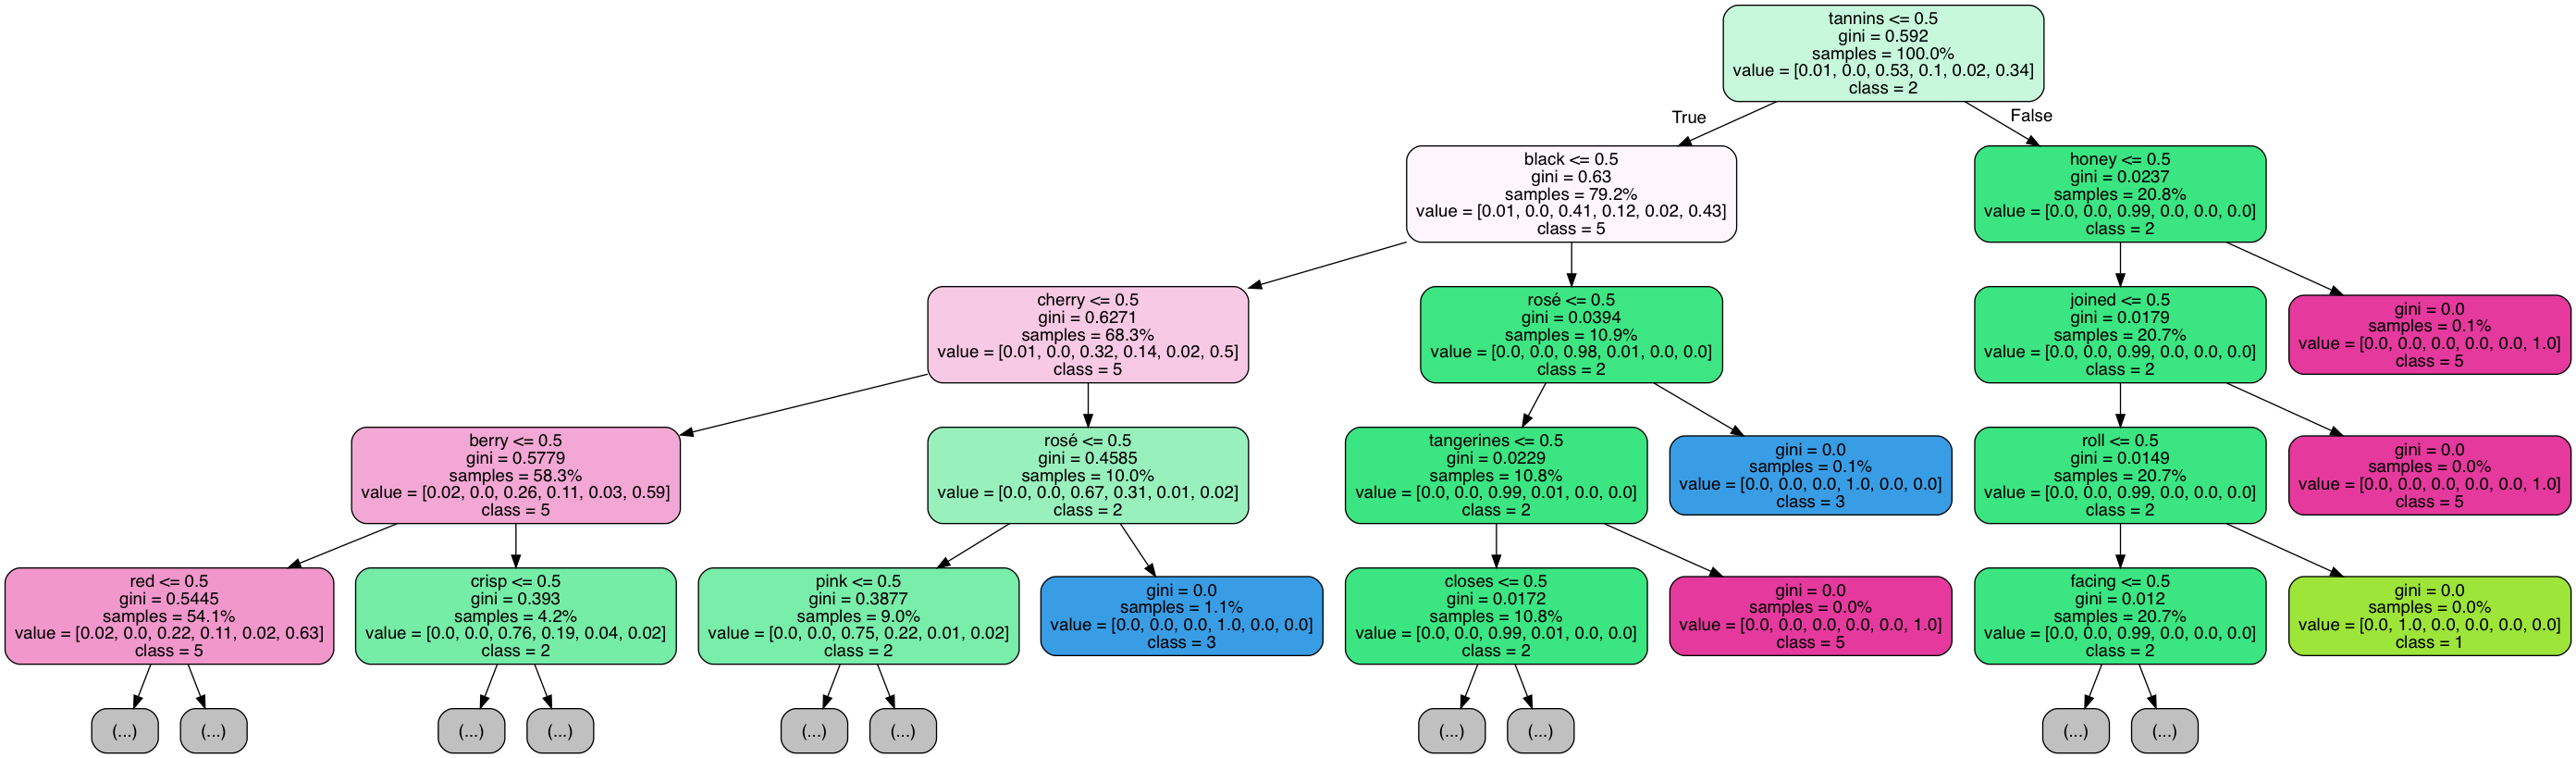

In [71]:
%matplotlib inline

import pydotplus
from sklearn import tree
from IPython.display import Image  

dot_data = tree.export_graphviz(clf, out_file=None, 
    max_depth=4,
    feature_names=vec.get_feature_names(),  
    class_names=clf.classes_.astype(str),  
    filled=True, rounded=True,  proportion=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())